### **Customer Segmentation Analysis**

Name: Vignesh.M

Domain: Data Analytics

Oasis Infobyte Virtual Internship Program

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading**

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.rename(columns={'Genre':'Gender'}, inplace=True)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [9]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
df.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [11]:
df.groupby('Gender').describe()

CustomerID                                                           \
            count        mean        std  min    25%    50%     75%    max   
Gender                                                                       
Female      112.0   97.562500  58.276412  3.0  46.75   94.5  148.25  197.0   
Male         88.0  104.238636  57.483830  1.0  59.50  106.5  151.25  200.0   

          Age             ... Annual Income (k$)         \
        count       mean  ...                75%    max   
Gender                    ...                             
Female  112.0  38.098214  ...              77.25  126.0   
Male     88.0  39.806818  ...              78.00  137.0   

       Spending Score (1-100)                                              \
                        count       mean       std  min   25%   50%   75%   
Gender                                                                      
Female                  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0   
Male                     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0   

              
         max  
Gender        
Female  99.0  
Male    97.0  

[2 rows x 32 columns]

In [12]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


**EDA Analysis**

**Distribution Plot**

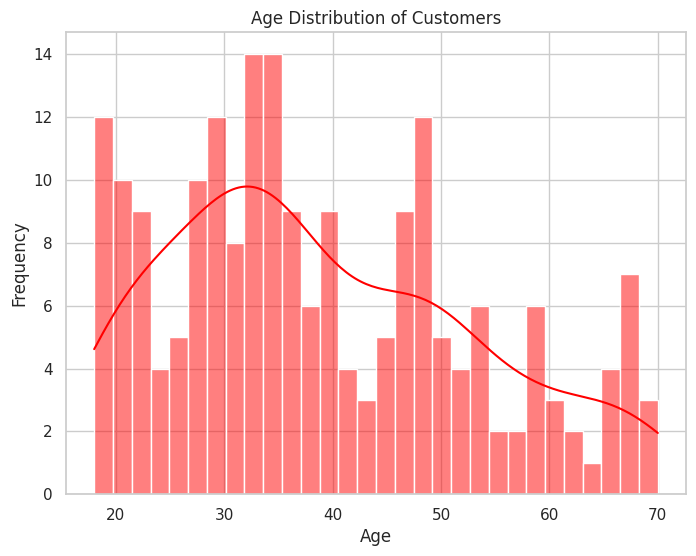

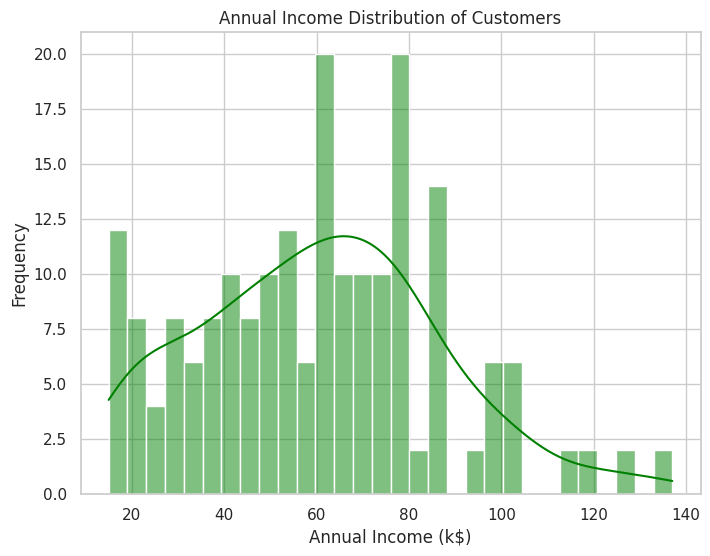

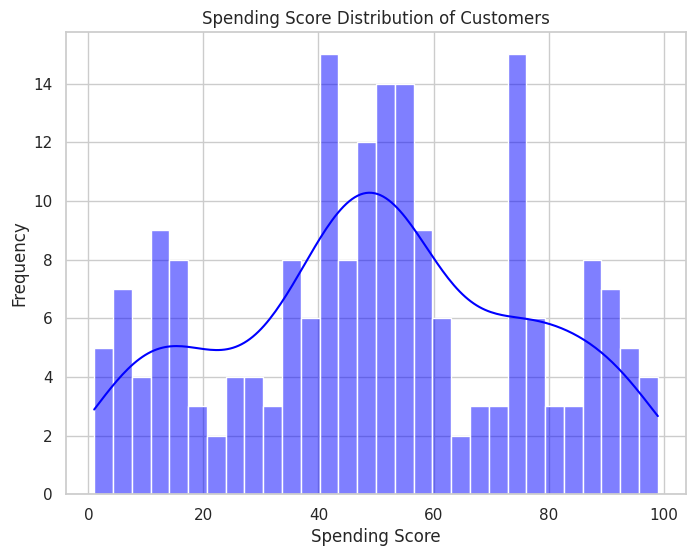

In [39]:
# Distribution Plot

plt.figure(figsize=(8, 6))
sns.set (style="whitegrid")
sns.histplot(df['Age'], bins=30, kde=True, color = 'red')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income (k$)'], bins=30, kde=True, color = 'green')
plt.title('Annual Income Distribution of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True, color = 'blue')
plt.title('Spending Score Distribution of Customers')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()


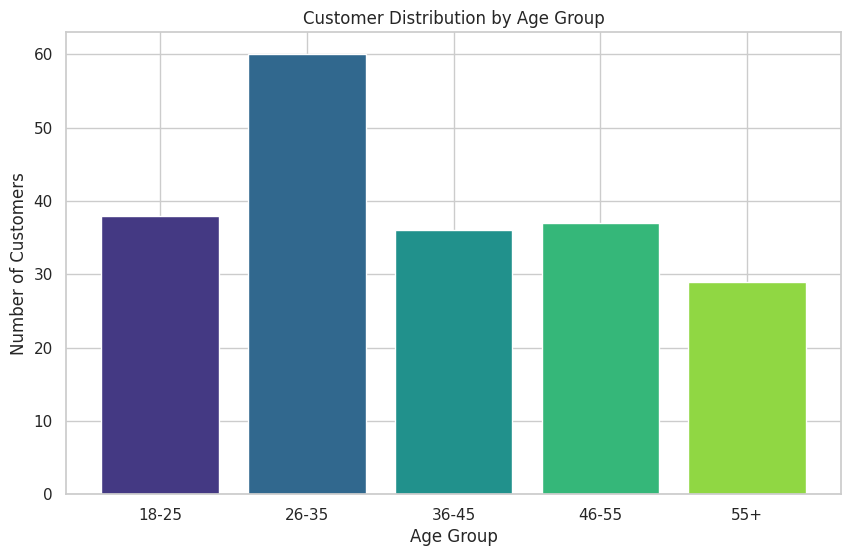

In [49]:
# Customer Distribution by Age groups

age_groups = [(18, 25), (26, 35), (36, 45), (46, 55), (56, float('inf'))]
age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']
age_counts = []

for age_range in age_groups:
    count = df[(df['Age'] >= age_range[0]) & (df['Age'] <= age_range[1])]['Age'].count()
    age_counts.append(count)

plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', n_colors=len(age_labels))
plt.bar(age_labels, age_counts, color=colors)
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

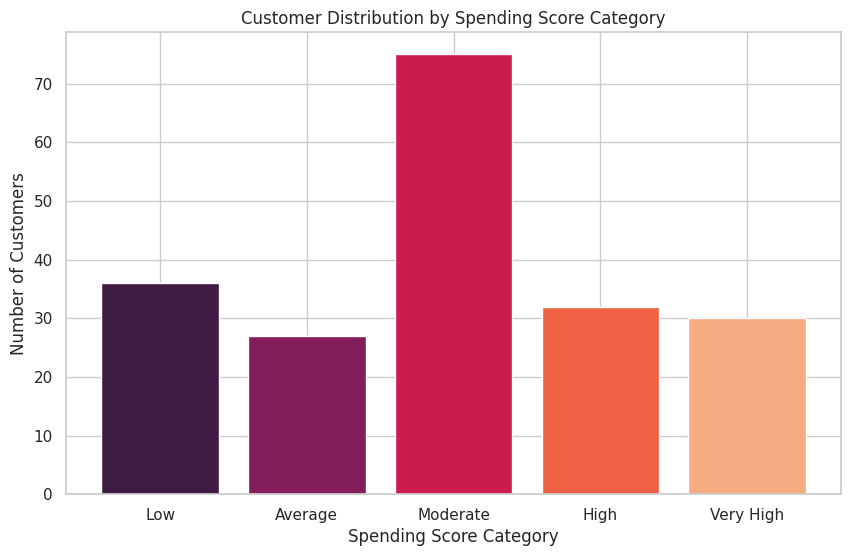

In [47]:
# Customer Distribution by Spending Score category

spending_score_categories = [(0, 20), (21, 40), (41, 60), (61, 80), (81, 100)]
spending_score_labels = ['Low', 'Average', 'Moderate', 'High', 'Very High']

category_counts = []
for score_range in spending_score_categories:
    count = df[(df['Spending Score (1-100)'] >= score_range[0]) & (df['Spending Score (1-100)'] <= score_range[1])]['Spending Score (1-100)'].count()
    category_counts.append(count)

plt.figure(figsize=(10, 6))
colors = sns.color_palette('rocket', n_colors=len(spending_score_labels))
plt.bar(spending_score_labels, category_counts, color=colors)
plt.title('Customer Distribution by Spending Score Category')
plt.xlabel('Spending Score Category')
plt.ylabel('Number of Customers')
plt.show()

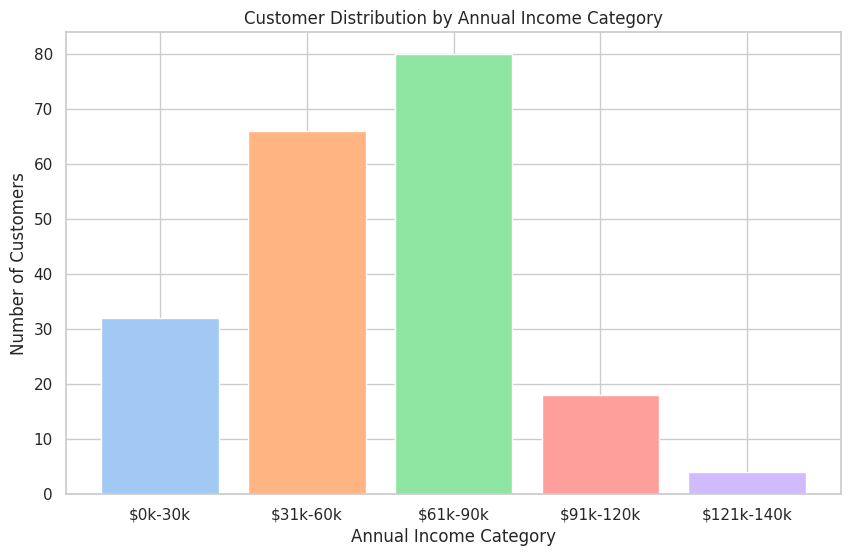

In [50]:
# Customer Distribution by Annual Income Category

annual_income_categories = [(0, 30), (31, 60), (61, 90), (91, 120), (121, 140)]
annual_income_labels = ['Low', 'Moderate', 'High', 'Very High', 'Extremely High']
income_range_labels = ['$0k-30k', '$31k-60k', '$61k-90k', '$91k-120k', '$121k-140k']

category_counts = []
for income_range in annual_income_categories:
    count = df[(df['Annual Income (k$)'] >= income_range[0]) & (df['Annual Income (k$)'] <= income_range[1])]['Annual Income (k$)'].count()
    category_counts.append(count)

plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel', n_colors=len(annual_income_labels))
plt.bar(income_range_labels, category_counts, color=colors)
plt.title('Customer Distribution by Annual Income Category')
plt.xlabel('Annual Income Category')
plt.ylabel('Number of Customers')
plt.show()

**Count Plot**

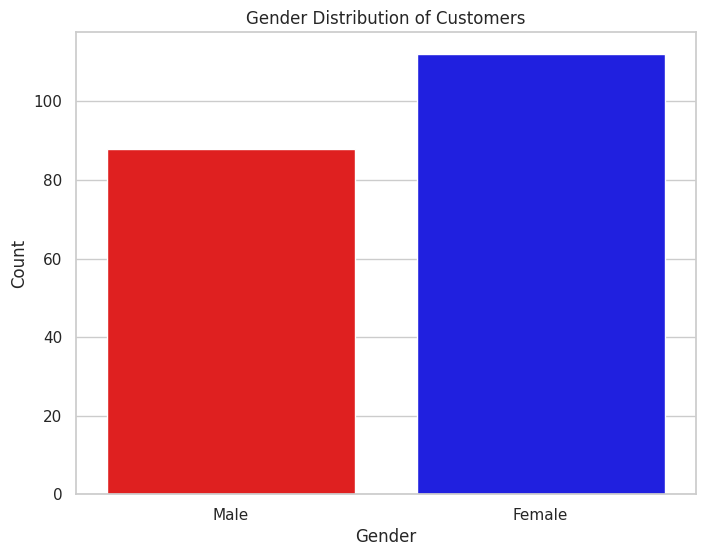

In [35]:
# Count plot

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, hue='Gender', palette={"Male":"red","Female":"blue"}, legend=False)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Scatterplot**

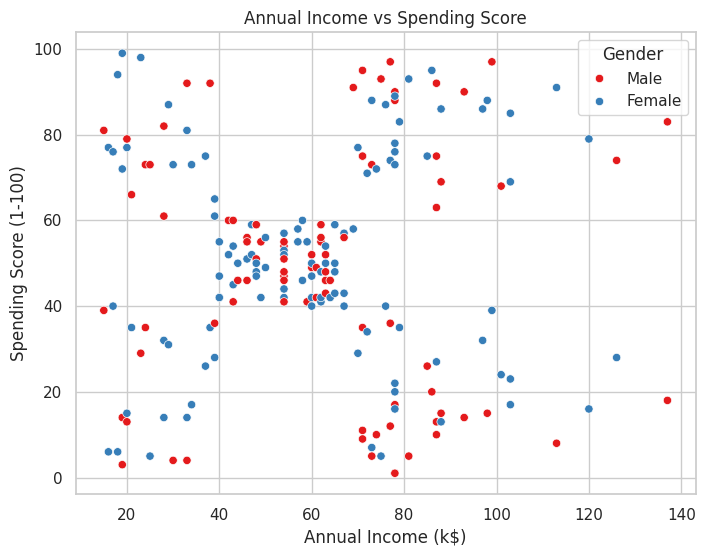

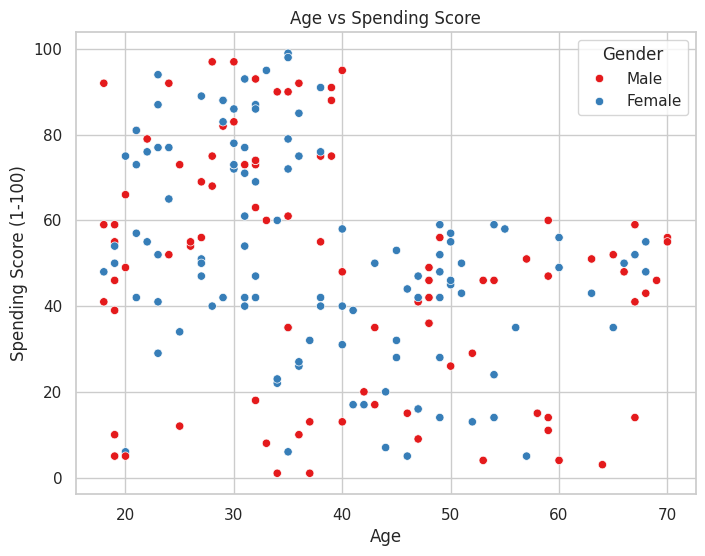

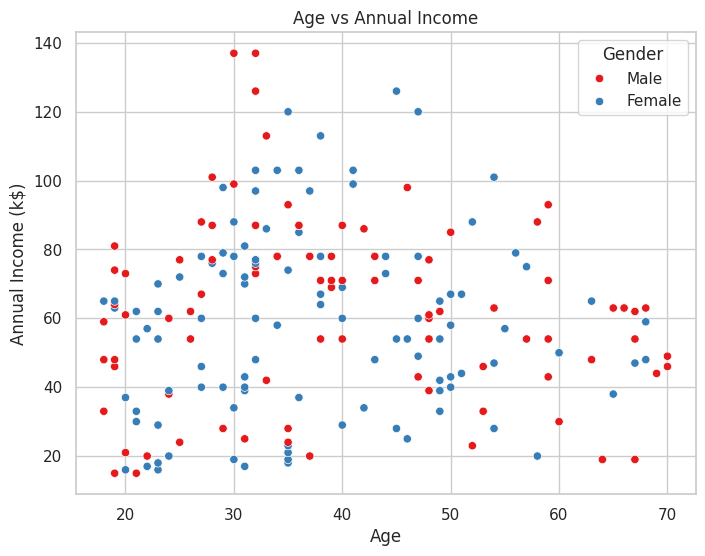

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set1')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set1')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, palette='Set1')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel
plt.show()

**BOXPLOT**

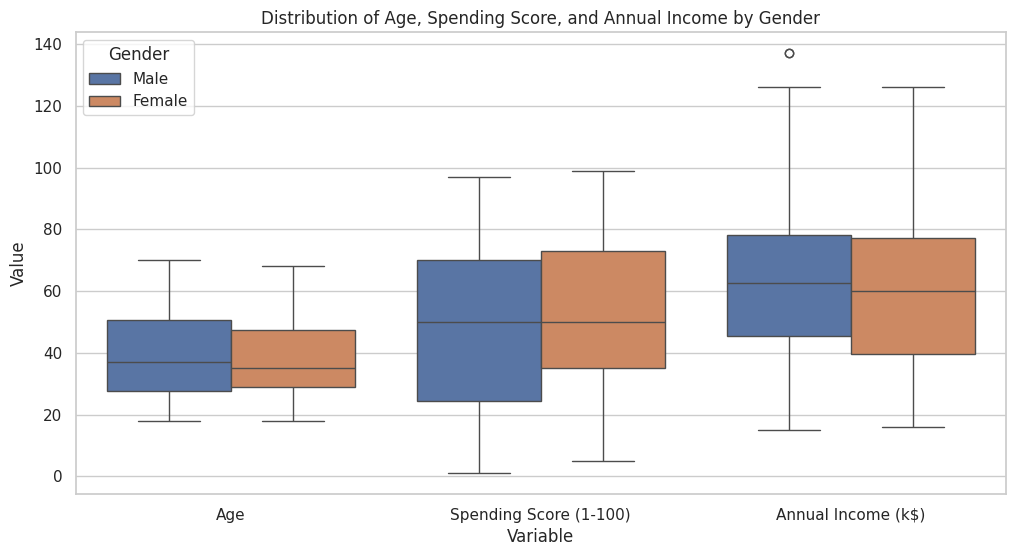

In [19]:
#Box Plot for Age, Spending Score and Annual Income

df_boxplot = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)', 'Gender']]
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='Gender', data=pd.melt(df_boxplot, id_vars=['Gender']))
plt.title('Distribution of Age, Spending Score, and Annual Income by Gender')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

**PAIRPLOT**



<Figure size 800x600 with 0 Axes>

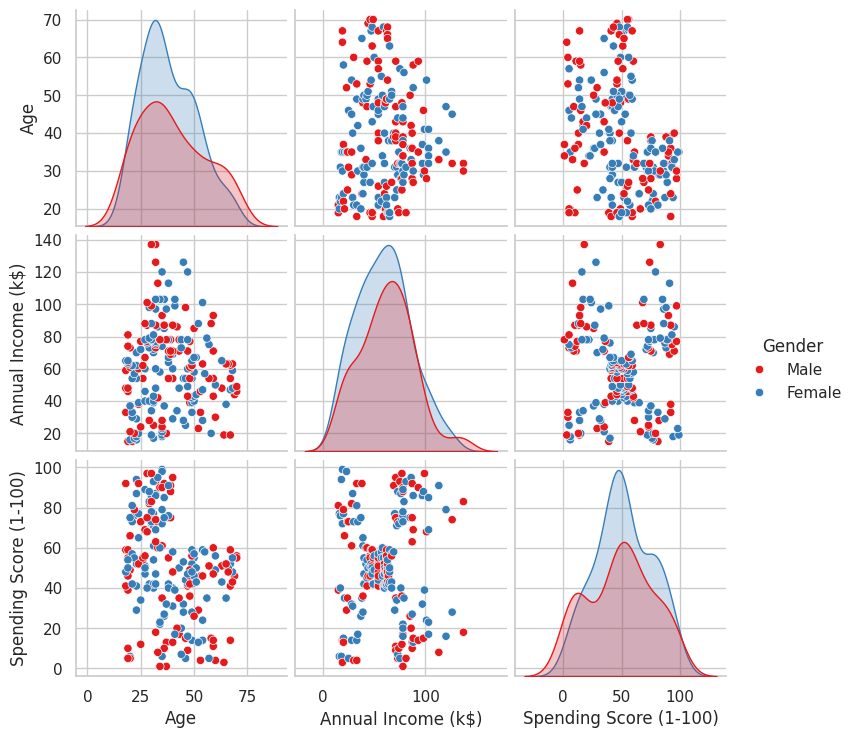

In [21]:
plt.figure (figsize=(8, 6))
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', palette='Set1')
plt.show()

**CORELATION MATRIX**

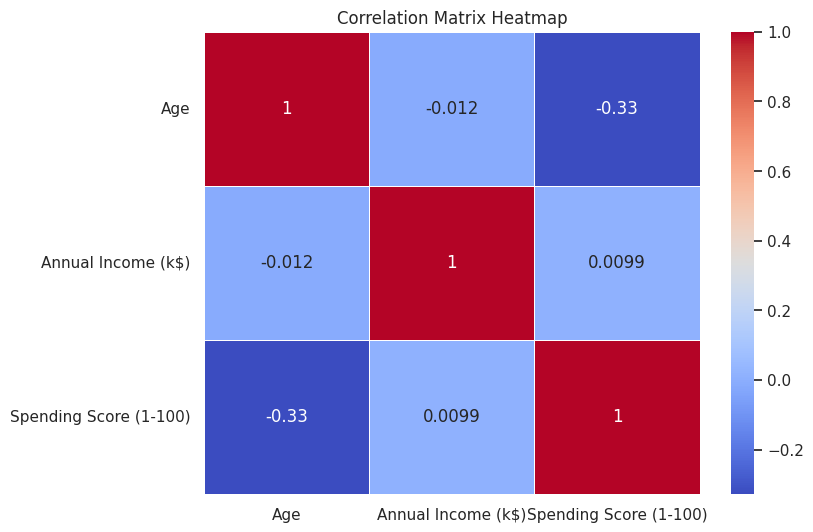

In [25]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols.drop('CustomerID')
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**CLUSTERING USING K-MEANS**

**Standardising the data for Clustering**

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standarsise the data for clustering

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

**Finding the Optimal Number of Clusters using Elbow Method**

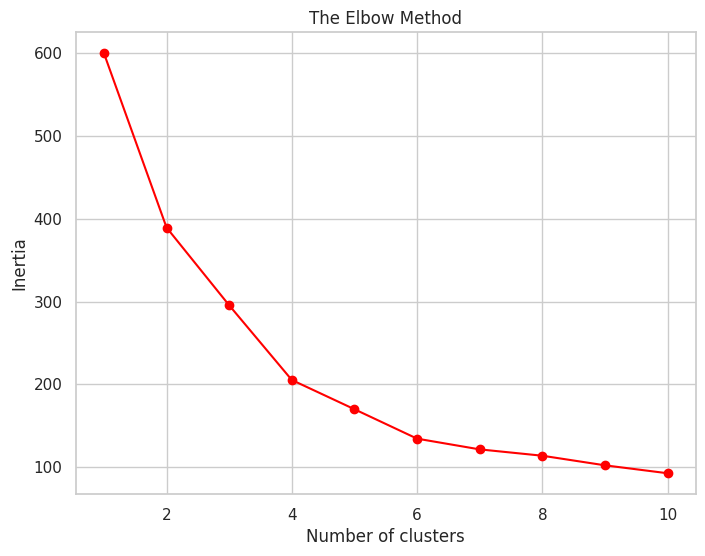

In [27]:
# Elbow method to determine the optimal nuber of clusters

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'o-', color ='red')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

**Applying Kmeans Clustering**

**Optimal Number of Clusters - 5**

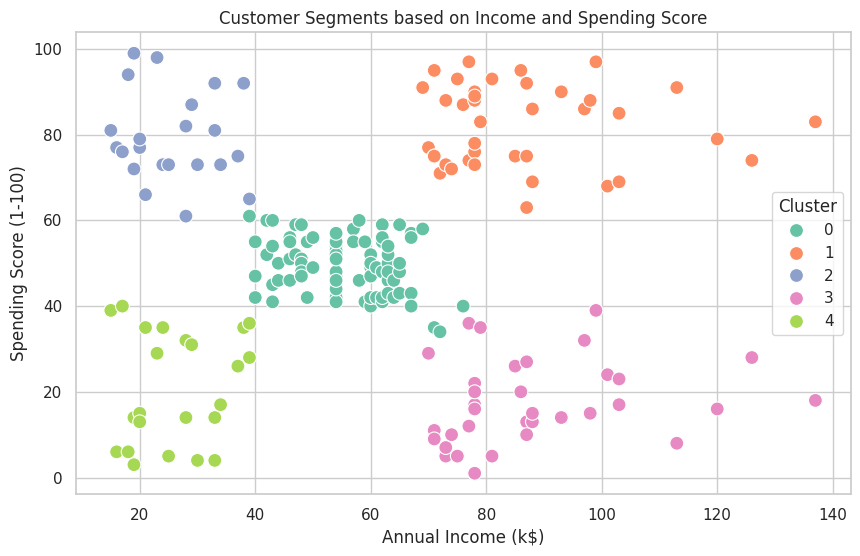

Silhouette Score for k=5: 0.554


In [28]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score for k=5: {sil_score:.3f}')

In [29]:
# Fit the K-means model with 5 clusters (assumed optimal)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(df['Cluster'].value_counts())

print(kmeans.cluster_centers_)

Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


**VISUALISATION**

**Visualising Clusters**

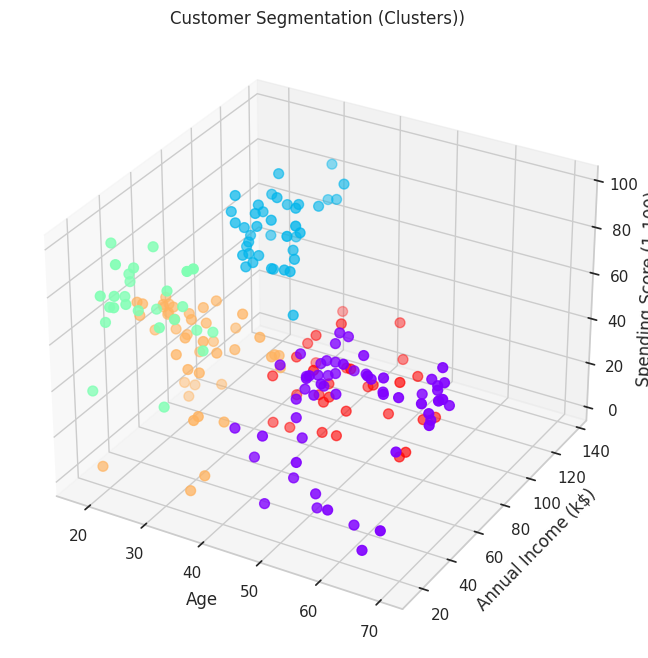

In [30]:
# Visualising Clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segmentation (Clusters))')
plt.show()

**Silhoutte Score**

In [31]:
# Model Evaluation with Silhoutte score

from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.40846873777345605


**END**